In [1]:
from generator import image_load_generator_x,image_load_generator_blurry
from model_sequential import model_res
import os
import tensorflow

In [2]:
batch_size = 15
input_size = (200,200,3)

image_blurry = image_load_generator_blurry('data/train',batch_size)
image_normal = image_load_generator_x('data/train',batch_size)

image_blurry_val = image_load_generator_x('data/validation',batch_size)
image_normal_val = image_load_generator_blurry('data/validation',batch_size)

data_generator = zip(image_blurry,image_normal)
val_datagen = zip(image_blurry_val,image_normal_val)


steps_train = len(os.listdir('data/train')) // batch_size
steps_val = len(os.listdir('data/validation')) // batch_size

In [3]:
model = model_res(input_size)

In [4]:
model.compile(loss="mean_squared_error",optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 128)     18560     
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                        

In [5]:
history = model.fit(data_generator,
                    steps_per_epoch = steps_train,
                    verbose=1,
                    epochs=50, 
                    validation_data=val_datagen, 
                    validation_steps = steps_val,
                    shuffle=False)
                    
            

Epoch 1/50
800/800 [==============================] - 309s 369ms/step - loss: 0.0121 - accuracy: 0.6040 - val_loss: 0.0319 - val_accuracy: 0.6445
Epoch 2/50
800/800 [==============================] - 366s 457ms/step - loss: 0.0044 - accuracy: 0.7645 - val_loss: 0.0493 - val_accuracy: 0.6832
Epoch 3/50
800/800 [==============================] - 404s 505ms/step - loss: 0.0034 - accuracy: 0.7953 - val_loss: 0.0646 - val_accuracy: 0.6806
Epoch 4/50
800/800 [==============================] - 384s 480ms/step - loss: 0.0035 - accuracy: 0.7881 - val_loss: 0.0753 - val_accuracy: 0.6639
Epoch 5/50
800/800 [==============================] - 382s 478ms/step - loss: 0.0028 - accuracy: 0.7984 - val_loss: 0.0945 - val_accuracy: 0.6679
Epoch 6/50
800/800 [==============================] - 371s 464ms/step - loss: 0.0070 - accuracy: 0.6974 - val_loss: 0.0213 - val_accuracy: 0.4875
Epoch 7/50
800/800 [==============================] - 360s 450ms/step - loss: 0.0112 - accuracy: 0.4868 - val_loss: 0.0381 -

In [6]:
image_blurry_test = image_load_generator_blurry('data/test',batch_size)
image_normal_test = image_load_generator_x('data/test',batch_size)

In [7]:
model.save('model_mse_adam.h5')

In [8]:
import tensorflow as tf

In [43]:
#model = tf.keras.models.load_model('model.h5')
images = next(image_blurry_test)
images_truth = next(image_normal_test)

prediction = model.predict(images)

1/1 [==============================] - 0s 24ms/step


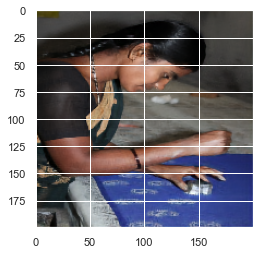

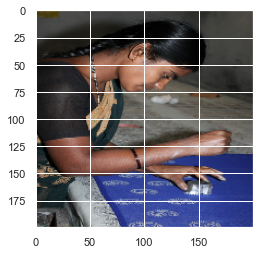

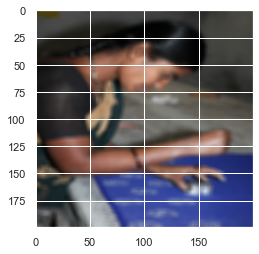

In [50]:
import matplotlib.pyplot as plt
import random
import numpy as np
number = random.randint(0,9)

image = prediction[number] 

plt.imshow(image)
plt.show()

plt.imshow(images_truth[number] )
plt.show()

plt.imshow(images[number])
plt.show()

In [11]:
def make_accuracy_plot(history):
    """
    Accuracy plot of model 
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Training accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

def make_loss_plot(history):
    """
    Loss plot of model
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Training loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.legend()
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

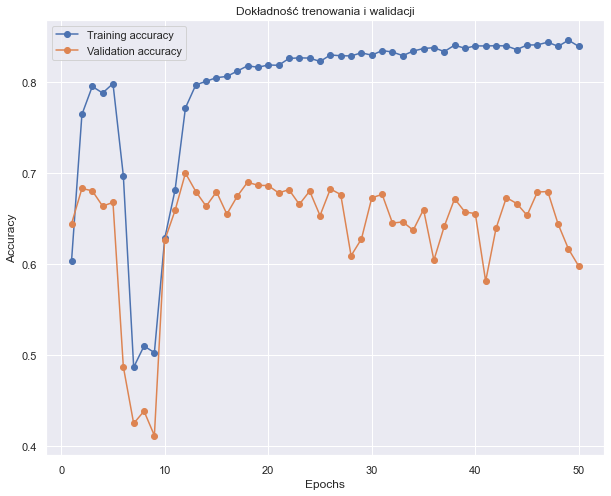

In [12]:
make_accuracy_plot(history)

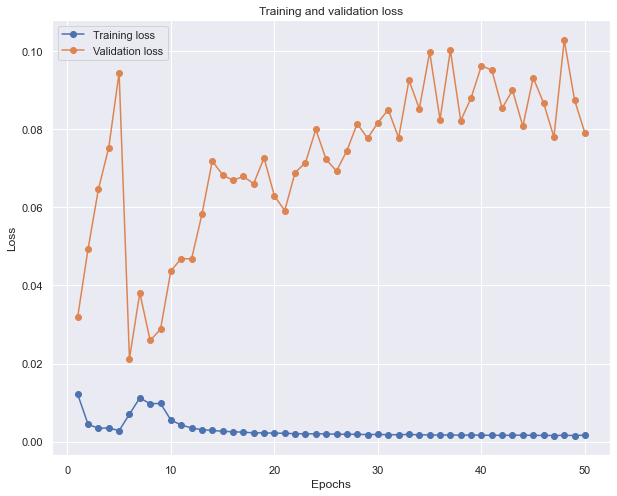

In [13]:
make_loss_plot(history)

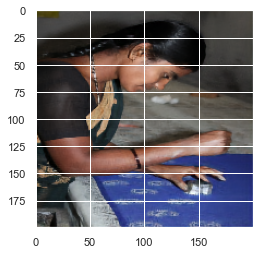